In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Step 1: Load the dataset
orders = pd.read_csv("customer_orders.csv", parse_dates=["order_date"])

In [16]:
# Step 2: Extract OrderMonth and CohortMonth
orders['OrderMonth'] = orders['order_date'].dt.to_period('M').dt.to_timestamp()
orders['CohortMonth'] = orders.groupby('customer_id')['order_date'].transform('min').dt.to_period('M').dt.to_timestamp()

In [18]:
#Print to verify
print("Sample rows after OrderMonth and CohortMonth creation:")
print(orders[['customer_id', 'order_date', 'OrderMonth', 'CohortMonth']].head())

Sample rows after OrderMonth and CohortMonth creation:
   customer_id order_date OrderMonth CohortMonth
0         2824 2023-05-28 2023-05-01  2021-03-01
1         5012 2022-05-23 2022-05-01  2022-05-01
2         2679 2023-11-19 2023-11-01  2021-10-01
3         2424 2021-11-21 2021-11-01  2021-05-01
4         1488 2021-03-21 2021-03-01  2021-03-01


In [19]:
# Step 3: Calculate MonthsSinceCohort correctly
orders['MonthsSinceCohort'] = (
    (orders['OrderMonth'].dt.year - orders['CohortMonth'].dt.year) * 12 +
    (orders['OrderMonth'].dt.month - orders['CohortMonth'].dt.month)
)

In [20]:
#Print to verify
print("Sample rows after MonthsSinceCohort calculation:")
print(orders[['customer_id', 'OrderMonth', 'CohortMonth', 'MonthsSinceCohort']].head())

Sample rows after MonthsSinceCohort calculation:
   customer_id OrderMonth CohortMonth  MonthsSinceCohort
0         2824 2023-05-01  2021-03-01                 26
1         5012 2022-05-01  2022-05-01                  0
2         2679 2023-11-01  2021-10-01                 25
3         2424 2021-11-01  2021-05-01                  6
4         1488 2021-03-01  2021-03-01                  0


In [21]:
# Step 4: Create cohort group counts
cohort_data = orders.groupby(['CohortMonth', 'MonthsSinceCohort'])['customer_id'].nunique().reset_index()

In [22]:
# Step 5: Create pivot table
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='MonthsSinceCohort', values='customer_id')

In [23]:
# Step 6: Normalize to get retention %
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

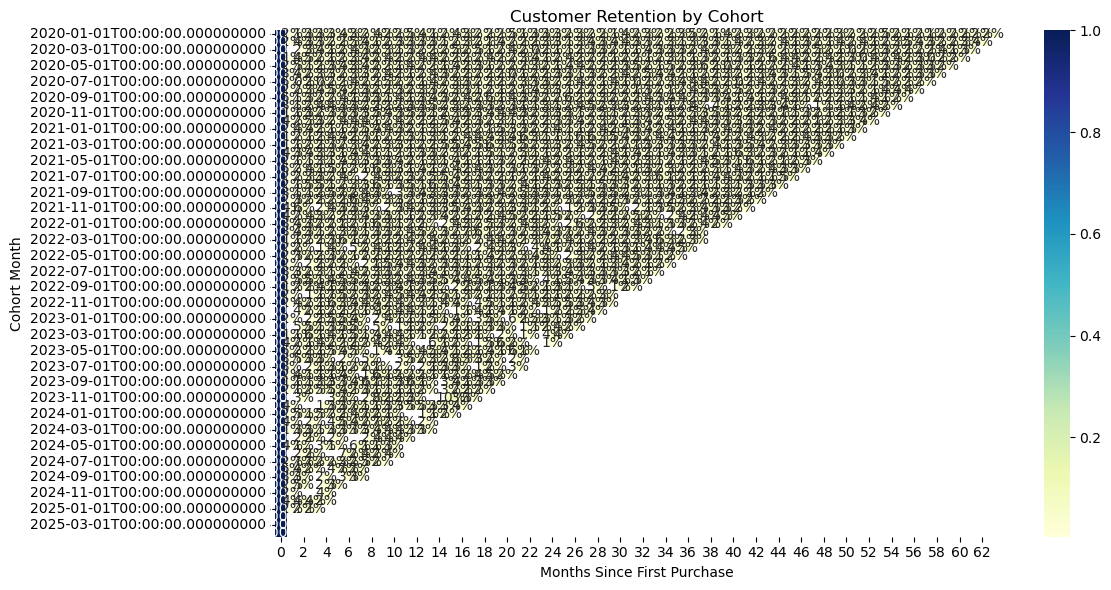

In [24]:
# Step 7: Visualize
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Customer Retention by Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.tight_layout()
plt.show()